In [1]:
from matplotlib import pyplot as plt
from matplotlib import offsetbox
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [10]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
digits_transformed = embedding.fit_transform(digits.data)
print(digits_transformed.shape)

C:\Users\loren\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\loren\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


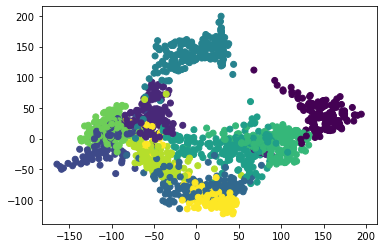

In [11]:
plt.scatter(digits_transformed[:,0], digits_transformed[:,1], c=digits.target)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0) # i take 20% of data for testing

In [15]:
clf = LogisticRegression(penalty='l2', max_iter=2000,solver='sag').fit(X_train, y_train)

In [16]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy of the emulator is: ', acc)

The accuracy of the emulator is:  0.9611111111111111


In [17]:
from sklearn.metrics import confusion_matrix
print('I can see the confusion matrix: \n')
print(confusion_matrix(y_test, y_pred))

I can see the confusion matrix: 

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  2]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]
